In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet3plus2d',
           discriminator='cnnplus',
           filter_num_down=[16, 32, 64, 128, 256], 
           filter_num_skip=[16, 16, 16, 16], 
           filter_num_aggregate=32, 
           stack_num_down=2, 
           stack_num_up=1, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=False, 
           pool=False, 
           unpool=False, 
           deep_supervision=False, 
           optimizer=None, 
           loss=None,
           metric=None
          )

KUNet3Plus2D: None, None, None
*** GP2  KUNet3Plus2D ***
Working directory: /tmp/tmpv219wmgfGP2
Using  discriminator (CNN+)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_masks.npy')

In [5]:
images = images[:6392]
masks = masks[:6392]

In [6]:
images.shape

(6392, 512, 512, 1)

In [7]:
masks.shape

(6392, 512, 512, 1)

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 35s 5s/step - loss: 0.6613 - dice_coeff: 0.4084 - val_loss: 0.7020 - val_dice_coeff: 0.2803
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 0.5768 - dice_coeff: 0.4519 - val_loss: 0.7113 - val_dice_coeff: 0.2902
Epoch 3/100
5/5 [==============================] - 7s 2s/step - loss: 0.5212 - dice_coeff: 0.4888 - val_loss: 0.7187 - val_dice_coeff: 0.2980
Epoch 4/100
5/5 [==============================] - 7s 1s/step - loss: 0.4795 - dice_coeff: 0.5140 - val_loss: 0.7241 - val_dice_coeff: 0.3043
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 0.4403 - dice_coeff: 0.5385 - val_loss: 0.7276 - val_dice_coeff: 0.3092
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: 0.4063 - dice_coeff: 0.5607 - val_loss: 0.7287 - val_dice_coeff: 0.3132
Epoch 7/100
5/5 [==============================] - 7s 1s/step - loss: 0.3758 - dice_coeff: 0.5824 - val_loss: 0.7300 - va

In [10]:
R.classifier_scores

[[0.5009759068489075, 0.40262946486473083],
 [0.41936391592025757, 0.38937872648239136],
 [0.31825223565101624, 0.49813249707221985],
 [0.2543030381202698, 0.5226679444313049],
 [0.21487830579280853, 0.6082583069801331],
 [0.17822550237178802, 0.6963765025138855],
 [0.1901296079158783, 0.7252477407455444],
 [0.1769774854183197, 0.7049188613891602]]

In [11]:
R.discriminator_scores

[[0.6379176378250122, 0.9791122674942017],
 [0.28614917397499084, 0.9817232489585876],
 [0.18912599980831146, 0.9843342304229736],
 [0.2793976664543152, 0.9817232489585876],
 [3.390721321105957, 0.8616188168525696],
 [2.246811628341675, 0.8903394341468811],
 [7.0270538330078125, 0.7989556193351746],
 [6.604609489440918, 0.8041775226593018]]

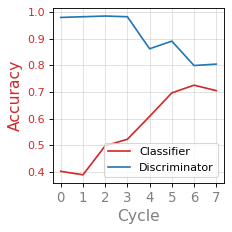

In [12]:
R.plot()